In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense,LSTM,Dropout, Activation

import datetime

In [2]:
dataset = pd.read_csv('../dataset/005930.KS.csv', sep=',')

data = dataset.dropna()

dataset.head()
dataset.info()
dataset.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1236 non-null   object 
 1   High       1236 non-null   float64
 2   Low        1236 non-null   float64
 3   Open       1236 non-null   float64
 4   Close      1236 non-null   float64
 5   Volume     1236 non-null   float64
 6   Adj Close  1236 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.7+ KB


,High,Low,Open,Close,Volume,Adj Close
count,1236.000000,1236.000000,1236.000000,1236.000000,1.236000e+03,1236.000000
mean,44516.165049,43621.885113,44066.593851,44072.993528,1.348437e+07,30471.011696
std,10319.650609,10085.416509,10224.846097,10194.211048,7.344209e+06,21593.822057
min,22660.000000,21760.000000,21760.000000,22520.000000,0.000000e+00,254.533798
25%,38757.500000,37957.500000,38115.000000,38272.500000,8.869262e+06,8122.578247
50%,46500.000000,45650.000000,46150.000000,46090.000000,1.152018e+07,41875.000000
75%,51340.000000,50300.000000,50800.000000,50750.000000,1.561984e+07,48400.000000
max,69500.000000,67600.000000,68400.000000,68200.000000,6.468130e+07,68200.000000


In [3]:
df=data[['Close']]
df.shape
df=np.array(df)

In [4]:
sequen_len=10
seq_len =sequen_len+1


windows=[]
x=[]
y=[]
for i in range(len(df)-seq_len):
    windows.append(df[i:i+seq_len])


In [5]:
standardized_data = []
for win in windows:
    tandardized_window = [(p - np.mean(win)) / (np.std(win)) for p in win]
    standardized_data.append(tandardized_window)

In [6]:
windows = np.array(standardized_data)

x = windows[:,:-1]
x = np.reshape(x,(x.shape[0], x.shape[1],1))
y = windows[:,-1]


In [7]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=seed)


In [9]:
model = Sequential()
model.add(LSTM(60, return_sequences=True, input_shape=(x.shape[1], x.shape[2])))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(20, return_sequences=False))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam')
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 60)            14880     
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 50)            22200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 32)            10624     
_________________________________________________________________
lstm_3 (LSTM)                (None, 20)                4240      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 51,965
Trainable params: 51,965
Non-trainable params: 0
_________________________________________________________________


In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', patience=30)
mc = ModelCheckpoint('005930.Ks.h5', mode='auto', verbose=1, save_best_only=True)

In [11]:
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test), callbacks=[mc], batch_size=10, epochs=1000)

Epoch 1/1000
94/98 [===========================>..] - ETA: 0s - loss: 0.8373
Epoch 00001: val_loss improved from inf to 0.46559, saving model to 005930.Ks.h5
98/98 [==============================] - 4s 37ms/step - loss: 0.8308 - val_loss: 0.4656
Epoch 2/1000
97/98 [============================>.] - ETA: 0s - loss: 0.4022
Epoch 00002: val_loss improved from 0.46559 to 0.34773, saving model to 005930.Ks.h5
98/98 [==============================] - 1s 13ms/step - loss: 0.4010 - val_loss: 0.3477
Epoch 3/1000
97/98 [============================>.] - ETA: 0s - loss: 0.1391
Epoch 00003: val_loss improved from 0.34773 to 0.06478, saving model to 005930.Ks.h5
98/98 [==============================] - 1s 13ms/step - loss: 0.1385 - val_loss: 0.0648
Epoch 4/1000
95/98 [============================>.] - ETA: 0s - loss: 0.0411
Epoch 00004: val_loss improved from 0.06478 to 0.02927, saving model to 005930.Ks.h5
98/98 [==============================] - 1s 13ms/step - loss: 0.0421 - val_loss: 0.0293
Epoc

98/98 [==============================] - 1s 14ms/step - loss: 0.0014 - val_loss: 7.6757e-04
Epoch 37/1000
97/98 [============================>.] - ETA: 0s - loss: 0.0010    - ETA: 0s - loss: 0.0010
Epoch 00037: val_loss did not improve from 0.00077
98/98 [==============================] - 1s 13ms/step - loss: 0.0010 - val_loss: 8.4577e-04
Epoch 38/1000
97/98 [============================>.] - ETA: 0s - loss: 0.0031
Epoch 00038: val_loss did not improve from 0.00077
98/98 [==============================] - 1s 13ms/step - loss: 0.0031 - val_loss: 0.0017
Epoch 39/1000
95/98 [============================>.] - ETA: 0s - loss: 8.1540e-04
Epoch 00039: val_loss did not improve from 0.00077
98/98 [==============================] - 1s 13ms/step - loss: 8.5189e-04 - val_loss: 0.0020
Epoch 40/1000
96/98 [============================>.] - ETA: 0s - loss: 0.0073
Epoch 00040: val_loss did not improve from 0.00077
98/98 [==============================] - 1s 13ms/step - loss: 0.0073 - val_loss: 0.0071


Epoch 73/1000
97/98 [============================>.] - ETA: 0s - loss: 0.0010   
Epoch 00073: val_loss did not improve from 0.00027
98/98 [==============================] - 1s 14ms/step - loss: 0.0011 - val_loss: 0.0025
Epoch 74/1000
97/98 [============================>.] - ETA: 0s - loss: 0.0028
Epoch 00074: val_loss did not improve from 0.00027
98/98 [==============================] - 1s 14ms/step - loss: 0.0028 - val_loss: 0.0085
Epoch 75/1000
96/98 [============================>.] - ETA: 0s - loss: 0.0042
Epoch 00075: val_loss did not improve from 0.00027
98/98 [==============================] - 1s 12ms/step - loss: 0.0041 - val_loss: 0.0014
Epoch 76/1000
94/98 [===========================>..] - ETA: 0s - loss: 0.0018
Epoch 00076: val_loss did not improve from 0.00027
98/98 [==============================] - 1s 13ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 77/1000
97/98 [============================>.] - ETA: 0s - loss: 0.0029
Epoch 00077: val_loss did not improve from 0.00027


94/98 [===========================>..] - ETA: 0s - loss: 0.0053
Epoch 00109: val_loss did not improve from 0.00015
98/98 [==============================] - 1s 15ms/step - loss: 0.0052 - val_loss: 0.0076
Epoch 110/1000
96/98 [============================>.] - ETA: 0s - loss: 0.0020
Epoch 00110: val_loss did not improve from 0.00015
98/98 [==============================] - 1s 12ms/step - loss: 0.0019 - val_loss: 2.9529e-04
Epoch 111/1000
94/98 [===========================>..] - ETA: 0s - loss: 7.2661e-04
Epoch 00111: val_loss did not improve from 0.00015
98/98 [==============================] - 1s 12ms/step - loss: 7.0900e-04 - val_loss: 2.7080e-04
Epoch 112/1000
94/98 [===========================>..] - ETA: 0s - loss: 3.6088e-04
Epoch 00112: val_loss did not improve from 0.00015
98/98 [==============================] - 1s 13ms/step - loss: 3.5387e-04 - val_loss: 2.4242e-04
Epoch 113/1000
96/98 [============================>.] - ETA: 0s - loss: 1.8237e-04
Epoch 00113: val_loss did not im

97/98 [============================>.] - ETA: 0s - loss: 7.6796e-04
Epoch 00145: val_loss did not improve from 0.00015
98/98 [==============================] - 1s 13ms/step - loss: 7.6245e-04 - val_loss: 6.3433e-04
Epoch 146/1000
96/98 [============================>.] - ETA: 0s - loss: 4.4018e-04
Epoch 00146: val_loss did not improve from 0.00015
98/98 [==============================] - 1s 13ms/step - loss: 4.3498e-04 - val_loss: 2.5047e-04
Epoch 147/1000
97/98 [============================>.] - ETA: 0s - loss: 2.4954e-04
Epoch 00147: val_loss did not improve from 0.00015
98/98 [==============================] - 1s 13ms/step - loss: 2.4934e-04 - val_loss: 4.8622e-04
Epoch 148/1000
94/98 [===========================>..] - ETA: 0s - loss: 9.6864e-04
Epoch 00148: val_loss did not improve from 0.00015
98/98 [==============================] - 1s 13ms/step - loss: 9.6901e-04 - val_loss: 0.0022
Epoch 149/1000
95/98 [============================>.] - ETA: 0s - loss: 6.0023e-04
Epoch 00149: val

Epoch 181/1000
98/98 [==============================] - ETA: 0s - loss: 5.2063e-04
Epoch 00181: val_loss did not improve from 0.00014
98/98 [==============================] - 1s 13ms/step - loss: 5.2063e-04 - val_loss: 0.0011
Epoch 182/1000
94/98 [===========================>..] - ETA: 0s - loss: 0.0011  
Epoch 00182: val_loss did not improve from 0.00014
98/98 [==============================] - 1s 12ms/step - loss: 0.0013 - val_loss: 0.0045
Epoch 183/1000
96/98 [============================>.] - ETA: 0s - loss: 0.0044
Epoch 00183: val_loss did not improve from 0.00014
98/98 [==============================] - 1s 13ms/step - loss: 0.0043 - val_loss: 0.0015
Epoch 184/1000
98/98 [==============================] - ETA: 0s - loss: 3.2905e-04
Epoch 00184: val_loss did not improve from 0.00014
98/98 [==============================] - 1s 12ms/step - loss: 3.2905e-04 - val_loss: 3.0712e-04
Epoch 185/1000
95/98 [============================>.] - ETA: 0s - loss: 1.2401e-04
Epoch 00185: val_loss i

Epoch 217/1000
95/98 [============================>.] - ETA: 0s - loss: 1.2920e-04
Epoch 00217: val_loss did not improve from 0.00013
98/98 [==============================] - 1s 12ms/step - loss: 1.3951e-04 - val_loss: 8.7407e-04
Epoch 218/1000
96/98 [============================>.] - ETA: 0s - loss: 4.0432e-04
Epoch 00218: val_loss did not improve from 0.00013
98/98 [==============================] - 1s 12ms/step - loss: 3.9812e-04 - val_loss: 1.9634e-04
Epoch 219/1000
95/98 [============================>.] - ETA: 0s - loss: 1.3150e-04
Epoch 00219: val_loss did not improve from 0.00013
98/98 [==============================] - 1s 14ms/step - loss: 1.3789e-04 - val_loss: 3.3442e-04
Epoch 220/1000
96/98 [============================>.] - ETA: 0s - loss: 6.4539e-04
Epoch 00220: val_loss did not improve from 0.00013
98/98 [==============================] - 1s 13ms/step - loss: 6.4694e-04 - val_loss: 0.0016
Epoch 221/1000
97/98 [============================>.] - ETA: 0s - loss: 6.9306e-04
E

96/98 [============================>.] - ETA: 0s - loss: 1.6032e-04
Epoch 00253: val_loss did not improve from 0.00013
98/98 [==============================] - 1s 12ms/step - loss: 1.6091e-04 - val_loss: 3.4556e-04
Epoch 254/1000
95/98 [============================>.] - ETA: 0s - loss: 3.0167e-04
Epoch 00254: val_loss did not improve from 0.00013
98/98 [==============================] - 1s 13ms/step - loss: 2.9581e-04 - val_loss: 4.7868e-04
Epoch 255/1000
96/98 [============================>.] - ETA: 0s - loss: 5.8159e-04
Epoch 00255: val_loss did not improve from 0.00013
98/98 [==============================] - 1s 13ms/step - loss: 5.7256e-04 - val_loss: 6.6870e-04
Epoch 256/1000
95/98 [============================>.] - ETA: 0s - loss: 0.0013  
Epoch 00256: val_loss did not improve from 0.00013
98/98 [==============================] - 1s 12ms/step - loss: 0.0014 - val_loss: 0.0054
Epoch 257/1000
96/98 [============================>.] - ETA: 0s - loss: 0.0015
Epoch 00257: val_loss did 

98/98 [==============================] - ETA: 0s - loss: 2.6061e-0 - ETA: 0s - loss: 2.5678e-04
Epoch 00289: val_loss did not improve from 0.00013
98/98 [==============================] - 2s 20ms/step - loss: 2.5678e-04 - val_loss: 2.5424e-04
Epoch 290/1000
98/98 [==============================] - ETA: 0s - loss: 1.2468e-0 - ETA: 0s - loss: 1.2397e-04
Epoch 00290: val_loss did not improve from 0.00013
98/98 [==============================] - 2s 21ms/step - loss: 1.2397e-04 - val_loss: 2.2253e-04
Epoch 291/1000
98/98 [==============================] - ETA: 0s - loss: 2.0393e-04- ETA: 0s - 
Epoch 00291: val_loss did not improve from 0.00013
98/98 [==============================] - 2s 18ms/step - loss: 2.0393e-04 - val_loss: 2.9580e-04
Epoch 292/1000
94/98 [===========================>..] - ETA: 0s - loss: 1.1499e-04
Epoch 00292: val_loss did not improve from 0.00013
98/98 [==============================] - 1s 15ms/step - loss: 1.1670e-04 - val_loss: 4.3303e-04
Epoch 293/1000
96/98 [=====

96/98 [============================>.] - ETA: 0s - loss: 1.8512e-04
Epoch 00324: val_loss did not improve from 0.00012
98/98 [==============================] - 1s 12ms/step - loss: 1.8640e-04 - val_loss: 3.2378e-04
Epoch 325/1000
97/98 [============================>.] - ETA: 0s - loss: 4.0574e-04
Epoch 00325: val_loss did not improve from 0.00012
98/98 [==============================] - 1s 14ms/step - loss: 4.0647e-04 - val_loss: 2.1222e-04
Epoch 326/1000
95/98 [============================>.] - ETA: 0s - loss: 2.6713e-04
Epoch 00326: val_loss did not improve from 0.00012
98/98 [==============================] - 1s 12ms/step - loss: 2.6848e-04 - val_loss: 3.5913e-04
Epoch 327/1000
97/98 [============================>.] - ETA: 0s - loss: 8.5198e-04
Epoch 00327: val_loss did not improve from 0.00012
98/98 [==============================] - 1s 13ms/step - loss: 8.4971e-04 - val_loss: 3.5116e-04
Epoch 328/1000
97/98 [============================>.] - ETA: 0s - loss: 2.8063e-04
Epoch 00328:

Epoch 360/1000
94/98 [===========================>..] - ETA: 0s - loss: 0.0011    
Epoch 00360: val_loss did not improve from 0.00011
98/98 [==============================] - 1s 12ms/step - loss: 0.0011 - val_loss: 7.0311e-04
Epoch 361/1000
96/98 [============================>.] - ETA: 0s - loss: 3.0806e-04
Epoch 00361: val_loss did not improve from 0.00011
98/98 [==============================] - 1s 12ms/step - loss: 3.0566e-04 - val_loss: 1.1617e-04
Epoch 362/1000
95/98 [============================>.] - ETA: 0s - loss: 2.1480e-04
Epoch 00362: val_loss did not improve from 0.00011
98/98 [==============================] - 1s 12ms/step - loss: 2.2563e-04 - val_loss: 0.0012
Epoch 363/1000
96/98 [============================>.] - ETA: 0s - loss: 1.8393e-04
Epoch 00363: val_loss did not improve from 0.00011
98/98 [==============================] - 1s 12ms/step - loss: 1.8141e-04 - val_loss: 2.0303e-04
Epoch 364/1000
95/98 [============================>.] - ETA: 0s - loss: 5.2349e-04
Epoch

Epoch 396/1000
95/98 [============================>.] - ETA: 0s - loss: 2.5220e-04
Epoch 00396: val_loss did not improve from 0.00011
98/98 [==============================] - 1s 12ms/step - loss: 2.6587e-04 - val_loss: 8.3308e-04
Epoch 397/1000
94/98 [===========================>..] - ETA: 0s - loss: 3.6113e-04
Epoch 00397: val_loss did not improve from 0.00011
98/98 [==============================] - 1s 12ms/step - loss: 3.5959e-04 - val_loss: 2.1442e-04
Epoch 398/1000
96/98 [============================>.] - ETA: 0s - loss: 5.8578e-04
Epoch 00398: val_loss did not improve from 0.00011
98/98 [==============================] - 1s 12ms/step - loss: 6.1050e-04 - val_loss: 9.4315e-04
Epoch 399/1000
96/98 [============================>.] - ETA: 0s - loss: 0.0012
Epoch 00399: val_loss did not improve from 0.00011
98/98 [==============================] - 1s 12ms/step - loss: 0.0012 - val_loss: 5.7958e-04
Epoch 400/1000
96/98 [============================>.] - ETA: 0s - loss: 0.0035
Epoch 004

Epoch 432/1000
96/98 [============================>.] - ETA: 0s - loss: 3.6995e-04
Epoch 00432: val_loss did not improve from 0.00011
98/98 [==============================] - 1s 12ms/step - loss: 3.7635e-04 - val_loss: 3.4206e-04
Epoch 433/1000
95/98 [============================>.] - ETA: 0s - loss: 7.3253e-04
Epoch 00433: val_loss did not improve from 0.00011
98/98 [==============================] - 1s 12ms/step - loss: 7.5937e-04 - val_loss: 0.0045
Epoch 434/1000
95/98 [============================>.] - ETA: 0s - loss: 4.8017e-04
Epoch 00434: val_loss did not improve from 0.00011
98/98 [==============================] - 1s 12ms/step - loss: 4.7105e-04 - val_loss: 1.7185e-04
Epoch 435/1000
96/98 [============================>.] - ETA: 0s - loss: 6.4101e-04
Epoch 00435: val_loss did not improve from 0.00011
98/98 [==============================] - 1s 12ms/step - loss: 6.4065e-04 - val_loss: 0.0017
Epoch 436/1000
98/98 [==============================] - ETA: 0s - loss: 8.3407e-04
Epoch

Epoch 468/1000
96/98 [============================>.] - ETA: 0s - loss: 3.9649e-04
Epoch 00468: val_loss did not improve from 0.00010
98/98 [==============================] - 1s 12ms/step - loss: 3.9890e-04 - val_loss: 7.5833e-04
Epoch 469/1000
95/98 [============================>.] - ETA: 0s - loss: 8.2208e-04- ETA: 0s - loss: 7.2655e
Epoch 00469: val_loss did not improve from 0.00010
98/98 [==============================] - 1s 13ms/step - loss: 9.4704e-04 - val_loss: 0.0013
Epoch 470/1000
98/98 [==============================] - ETA: 0s - loss: 0.0015
Epoch 00470: val_loss did not improve from 0.00010
98/98 [==============================] - 1s 13ms/step - loss: 0.0015 - val_loss: 2.4120e-04
Epoch 471/1000
96/98 [============================>.] - ETA: 0s - loss: 1.0073e-04
Epoch 00471: val_loss did not improve from 0.00010
98/98 [==============================] - 1s 12ms/step - loss: 1.0064e-04 - val_loss: 1.4815e-04
Epoch 472/1000
95/98 [============================>.] - ETA: 0s - l

Epoch 504/1000
96/98 [============================>.] - ETA: 0s - loss: 2.0367e-04
Epoch 00504: val_loss did not improve from 0.00010
98/98 [==============================] - 1s 12ms/step - loss: 2.0277e-04 - val_loss: 1.1880e-04
Epoch 505/1000
94/98 [===========================>..] - ETA: 0s - loss: 6.4074e-04
Epoch 00505: val_loss did not improve from 0.00010
98/98 [==============================] - 1s 12ms/step - loss: 7.0323e-04 - val_loss: 0.0020
Epoch 506/1000
95/98 [============================>.] - ETA: 0s - loss: 7.8207e-04
Epoch 00506: val_loss did not improve from 0.00010
98/98 [==============================] - 1s 12ms/step - loss: 7.7381e-04 - val_loss: 2.2762e-04
Epoch 507/1000
94/98 [===========================>..] - ETA: 0s - loss: 4.1446e-04
Epoch 00507: val_loss did not improve from 0.00010
98/98 [==============================] - 1s 12ms/step - loss: 3.9997e-04 - val_loss: 1.7790e-04
Epoch 508/1000
97/98 [============================>.] - ETA: 0s - loss: 4.7970e-04
E

Epoch 540/1000
94/98 [===========================>..] - ETA: 0s - loss: 7.9530e-05
Epoch 00540: val_loss did not improve from 0.00010
98/98 [==============================] - 1s 12ms/step - loss: 7.8128e-05 - val_loss: 1.2273e-04
Epoch 541/1000
98/98 [==============================] - ETA: 0s - loss: 6.2417e-05
Epoch 00541: val_loss did not improve from 0.00010
98/98 [==============================] - 1s 12ms/step - loss: 6.2417e-05 - val_loss: 2.5445e-04
Epoch 542/1000
95/98 [============================>.] - ETA: 0s - loss: 8.1533e-05
Epoch 00542: val_loss did not improve from 0.00010
98/98 [==============================] - 1s 15ms/step - loss: 8.7611e-05 - val_loss: 2.3857e-04
Epoch 543/1000
96/98 [============================>.] - ETA: 0s - loss: 3.8512e-04
Epoch 00543: val_loss did not improve from 0.00010
98/98 [==============================] - 1s 14ms/step - loss: 3.8713e-04 - val_loss: 0.0017
Epoch 544/1000
96/98 [============================>.] - ETA: 0s - loss: 3.9768e-04
E

Epoch 576/1000
96/98 [============================>.] - ETA: 0s - loss: 1.4326e-04
Epoch 00576: val_loss did not improve from 0.00009
98/98 [==============================] - 1s 13ms/step - loss: 1.5976e-04 - val_loss: 0.0016
Epoch 577/1000
97/98 [============================>.] - ETA: 0s - loss: 0.0015
Epoch 00577: val_loss did not improve from 0.00009
98/98 [==============================] - 1s 13ms/step - loss: 0.0015 - val_loss: 3.9051e-04
Epoch 578/1000
97/98 [============================>.] - ETA: 0s - loss: 1.3962e-04
Epoch 00578: val_loss did not improve from 0.00009
98/98 [==============================] - 1s 13ms/step - loss: 1.3946e-04 - val_loss: 1.5877e-04
Epoch 579/1000
98/98 [==============================] - ETA: 0s - loss: 2.4065e-04
Epoch 00579: val_loss did not improve from 0.00009
98/98 [==============================] - 1s 13ms/step - loss: 2.4065e-04 - val_loss: 7.0740e-04
Epoch 580/1000
98/98 [==============================] - ETA: 0s - loss: 3.9801e-04
Epoch 005

Epoch 612/1000
96/98 [============================>.] - ETA: 0s - loss: 5.9914e-05
Epoch 00612: val_loss did not improve from 0.00009
98/98 [==============================] - 2s 18ms/step - loss: 6.3068e-05 - val_loss: 4.4088e-04
Epoch 613/1000
97/98 [============================>.] - ETA: 0s - loss: 8.2104e-05
Epoch 00613: val_loss did not improve from 0.00009
98/98 [==============================] - 2s 20ms/step - loss: 8.1624e-05 - val_loss: 1.4371e-04
Epoch 614/1000
98/98 [==============================] - ETA: 0s - loss: 1.8942e-04
Epoch 00614: val_loss did not improve from 0.00009
98/98 [==============================] - 1s 14ms/step - loss: 1.8942e-04 - val_loss: 4.3348e-04
Epoch 615/1000
97/98 [============================>.] - ETA: 0s - loss: 8.1462e-04
Epoch 00615: val_loss did not improve from 0.00009
98/98 [==============================] - 2s 16ms/step - loss: 8.1171e-04 - val_loss: 3.4209e-04
Epoch 616/1000
94/98 [===========================>..] - ETA: 0s - loss: 2.3293e-

Epoch 648/1000
95/98 [============================>.] - ETA: 0s - loss: 1.7174e-04- ETA: 0s - loss: 1.611
Epoch 00648: val_loss did not improve from 0.00009
98/98 [==============================] - 1s 12ms/step - loss: 1.7797e-04 - val_loss: 9.2492e-04
Epoch 649/1000
95/98 [============================>.] - ETA: 0s - loss: 1.6923e-04
Epoch 00649: val_loss did not improve from 0.00009
98/98 [==============================] - 1s 13ms/step - loss: 1.6682e-04 - val_loss: 2.0240e-04
Epoch 650/1000
94/98 [===========================>..] - ETA: 0s - loss: 1.4990e-04
Epoch 00650: val_loss did not improve from 0.00009
98/98 [==============================] - 1s 13ms/step - loss: 1.5443e-04 - val_loss: 6.6913e-04
Epoch 651/1000
98/98 [==============================] - ETA: 0s - loss: 8.2210e-04
Epoch 00651: val_loss did not improve from 0.00009
98/98 [==============================] - 1s 13ms/step - loss: 8.2210e-04 - val_loss: 7.6624e-04
Epoch 652/1000
96/98 [============================>.] - E

Epoch 684/1000
95/98 [============================>.] - ETA: 0s - loss: 8.3875e-04
Epoch 00684: val_loss did not improve from 0.00009
98/98 [==============================] - 1s 12ms/step - loss: 8.4011e-04 - val_loss: 4.7172e-04
Epoch 685/1000
96/98 [============================>.] - ETA: 0s - loss: 4.4359e-04
Epoch 00685: val_loss did not improve from 0.00009
98/98 [==============================] - 1s 12ms/step - loss: 4.3781e-04 - val_loss: 1.7686e-04
Epoch 686/1000
96/98 [============================>.] - ETA: 0s - loss: 1.2190e-04
Epoch 00686: val_loss did not improve from 0.00009
98/98 [==============================] - 1s 12ms/step - loss: 1.2016e-04 - val_loss: 2.5703e-04
Epoch 687/1000
96/98 [============================>.] - ETA: 0s - loss: 8.9589e-05
Epoch 00687: val_loss did not improve from 0.00009
98/98 [==============================] - 1s 12ms/step - loss: 8.9254e-05 - val_loss: 1.7971e-04
Epoch 688/1000
96/98 [============================>.] - ETA: 0s - loss: 2.3604e-

Epoch 720/1000
95/98 [============================>.] - ETA: 0s - loss: 1.0887e-04
Epoch 00720: val_loss did not improve from 0.00009
98/98 [==============================] - 1s 13ms/step - loss: 1.1267e-04 - val_loss: 5.4623e-04
Epoch 721/1000
96/98 [============================>.] - ETA: 0s - loss: 3.7672e-04
Epoch 00721: val_loss did not improve from 0.00009
98/98 [==============================] - 1s 12ms/step - loss: 3.6975e-04 - val_loss: 1.3399e-04
Epoch 722/1000
96/98 [============================>.] - ETA: 0s - loss: 1.1267e-04
Epoch 00722: val_loss did not improve from 0.00009
98/98 [==============================] - 1s 12ms/step - loss: 1.1456e-04 - val_loss: 3.9475e-04
Epoch 723/1000
96/98 [============================>.] - ETA: 0s - loss: 3.5535e-04
Epoch 00723: val_loss did not improve from 0.00009
98/98 [==============================] - 1s 12ms/step - loss: 3.5093e-04 - val_loss: 1.4643e-04
Epoch 724/1000
96/98 [============================>.] - ETA: 0s - loss: 9.2574e-

Epoch 756/1000
96/98 [============================>.] - ETA: 0s - loss: 5.8219e-05
Epoch 00756: val_loss did not improve from 0.00007
98/98 [==============================] - 1s 12ms/step - loss: 5.8797e-05 - val_loss: 1.1351e-04
Epoch 757/1000
98/98 [==============================] - ETA: 0s - loss: 1.6116e-04
Epoch 00757: val_loss did not improve from 0.00007
98/98 [==============================] - 1s 13ms/step - loss: 1.6116e-04 - val_loss: 3.2810e-04
Epoch 758/1000
96/98 [============================>.] - ETA: 0s - loss: 2.1191e-04
Epoch 00758: val_loss did not improve from 0.00007
98/98 [==============================] - 1s 12ms/step - loss: 2.1030e-04 - val_loss: 3.0689e-04
Epoch 759/1000
96/98 [============================>.] - ETA: 0s - loss: 2.9170e-04
Epoch 00759: val_loss did not improve from 0.00007
98/98 [==============================] - 1s 12ms/step - loss: 2.9554e-04 - val_loss: 2.0652e-04
Epoch 760/1000
96/98 [============================>.] - ETA: 0s - loss: 9.2751e-

Epoch 792/1000
96/98 [============================>.] - ETA: 0s - loss: 0.0011
Epoch 00792: val_loss did not improve from 0.00007
98/98 [==============================] - 1s 12ms/step - loss: 0.0010 - val_loss: 3.7449e-04
Epoch 793/1000
96/98 [============================>.] - ETA: 0s - loss: 1.0113e-04
Epoch 00793: val_loss did not improve from 0.00007
98/98 [==============================] - 1s 12ms/step - loss: 1.0052e-04 - val_loss: 1.0392e-04
Epoch 794/1000
96/98 [============================>.] - ETA: 0s - loss: 8.2601e-05
Epoch 00794: val_loss did not improve from 0.00007
98/98 [==============================] - 1s 12ms/step - loss: 8.3918e-05 - val_loss: 1.4059e-04
Epoch 795/1000
96/98 [============================>.] - ETA: 0s - loss: 6.4371e-05
Epoch 00795: val_loss did not improve from 0.00007
98/98 [==============================] - 1s 12ms/step - loss: 6.5063e-05 - val_loss: 1.5598e-04
Epoch 796/1000
96/98 [============================>.] - ETA: 0s - loss: 8.0999e-05
Epoch

Epoch 828/1000
96/98 [============================>.] - ETA: 0s - loss: 6.6826e-05
Epoch 00828: val_loss did not improve from 0.00007
98/98 [==============================] - 1s 12ms/step - loss: 6.6544e-05 - val_loss: 1.6705e-04
Epoch 829/1000
96/98 [============================>.] - ETA: 0s - loss: 8.1779e-05
Epoch 00829: val_loss did not improve from 0.00007
98/98 [==============================] - 1s 12ms/step - loss: 8.2039e-05 - val_loss: 1.3386e-04
Epoch 830/1000
96/98 [============================>.] - ETA: 0s - loss: 3.9974e-05
Epoch 00830: val_loss did not improve from 0.00007
98/98 [==============================] - 1s 12ms/step - loss: 4.0112e-05 - val_loss: 1.0457e-04
Epoch 831/1000
96/98 [============================>.] - ETA: 0s - loss: 4.9915e-05
Epoch 00831: val_loss did not improve from 0.00007
98/98 [==============================] - 1s 12ms/step - loss: 5.4033e-05 - val_loss: 1.1373e-04
Epoch 832/1000
96/98 [============================>.] - ETA: 0s - loss: 1.1824e-

Epoch 864/1000
96/98 [============================>.] - ETA: 0s - loss: 1.7713e-04
Epoch 00864: val_loss did not improve from 0.00007
98/98 [==============================] - 1s 12ms/step - loss: 1.7698e-04 - val_loss: 1.9336e-04
Epoch 865/1000
96/98 [============================>.] - ETA: 0s - loss: 1.3342e-04
Epoch 00865: val_loss did not improve from 0.00007
98/98 [==============================] - 1s 12ms/step - loss: 1.3302e-04 - val_loss: 9.7363e-05
Epoch 866/1000
96/98 [============================>.] - ETA: 0s - loss: 1.4065e-04
Epoch 00866: val_loss did not improve from 0.00007
98/98 [==============================] - 1s 12ms/step - loss: 1.3892e-04 - val_loss: 2.1977e-04
Epoch 867/1000
96/98 [============================>.] - ETA: 0s - loss: 1.3066e-04
Epoch 00867: val_loss did not improve from 0.00007
98/98 [==============================] - 1s 12ms/step - loss: 1.3059e-04 - val_loss: 1.1608e-04
Epoch 868/1000
96/98 [============================>.] - ETA: 0s - loss: 8.2621e-

Epoch 900/1000
96/98 [============================>.] - ETA: 0s - loss: 6.0049e-04
Epoch 00900: val_loss did not improve from 0.00007
98/98 [==============================] - 1s 12ms/step - loss: 5.9617e-04 - val_loss: 5.2840e-04
Epoch 901/1000
96/98 [============================>.] - ETA: 0s - loss: 1.3560e-04
Epoch 00901: val_loss did not improve from 0.00007
98/98 [==============================] - 1s 12ms/step - loss: 1.3471e-04 - val_loss: 1.4353e-04
Epoch 902/1000
96/98 [============================>.] - ETA: 0s - loss: 1.6369e-04
Epoch 00902: val_loss did not improve from 0.00007
98/98 [==============================] - 1s 12ms/step - loss: 1.6143e-04 - val_loss: 1.0468e-04
Epoch 903/1000
96/98 [============================>.] - ETA: 0s - loss: 1.2700e-04
Epoch 00903: val_loss did not improve from 0.00007
98/98 [==============================] - 1s 12ms/step - loss: 1.2704e-04 - val_loss: 1.4164e-04
Epoch 904/1000
95/98 [============================>.] - ETA: 0s - loss: 1.1252e-

Epoch 936/1000
96/98 [============================>.] - ETA: 0s - loss: 5.5015e-04
Epoch 00936: val_loss did not improve from 0.00007
98/98 [==============================] - 1s 12ms/step - loss: 5.4684e-04 - val_loss: 5.7231e-04
Epoch 937/1000
96/98 [============================>.] - ETA: 0s - loss: 5.9504e-04
Epoch 00937: val_loss did not improve from 0.00007
98/98 [==============================] - 1s 12ms/step - loss: 5.8994e-04 - val_loss: 8.6638e-04
Epoch 938/1000
94/98 [===========================>..] - ETA: 0s - loss: 6.8504e-04
Epoch 00938: val_loss did not improve from 0.00007
98/98 [==============================] - 1s 13ms/step - loss: 6.7419e-04 - val_loss: 4.3037e-04
Epoch 939/1000
96/98 [============================>.] - ETA: 0s - loss: 1.4933e-04
Epoch 00939: val_loss did not improve from 0.00007
98/98 [==============================] - 1s 12ms/step - loss: 1.5082e-04 - val_loss: 1.7987e-04
Epoch 940/1000
96/98 [============================>.] - ETA: 0s - loss: 1.1032e-

Epoch 972/1000
96/98 [============================>.] - ETA: 0s - loss: 1.3664e-04
Epoch 00972: val_loss did not improve from 0.00007
98/98 [==============================] - 1s 12ms/step - loss: 1.3619e-04 - val_loss: 1.3165e-04
Epoch 973/1000
96/98 [============================>.] - ETA: 0s - loss: 1.1368e-04
Epoch 00973: val_loss did not improve from 0.00007
98/98 [==============================] - 1s 12ms/step - loss: 1.2330e-04 - val_loss: 5.9164e-04
Epoch 974/1000
95/98 [============================>.] - ETA: 0s - loss: 7.9954e-04
Epoch 00974: val_loss did not improve from 0.00007
98/98 [==============================] - 1s 12ms/step - loss: 7.7797e-04 - val_loss: 2.0476e-04
Epoch 975/1000
96/98 [============================>.] - ETA: 0s - loss: 5.7555e-05
Epoch 00975: val_loss did not improve from 0.00007
98/98 [==============================] - 1s 13ms/step - loss: 5.7614e-05 - val_loss: 8.6684e-05
Epoch 976/1000
96/98 [============================>.] - ETA: 0s - loss: 1.4617e-

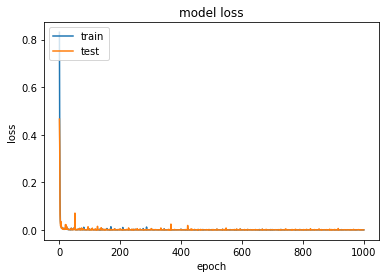

In [12]:
epochs = range(1, len(history.history['val_loss']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

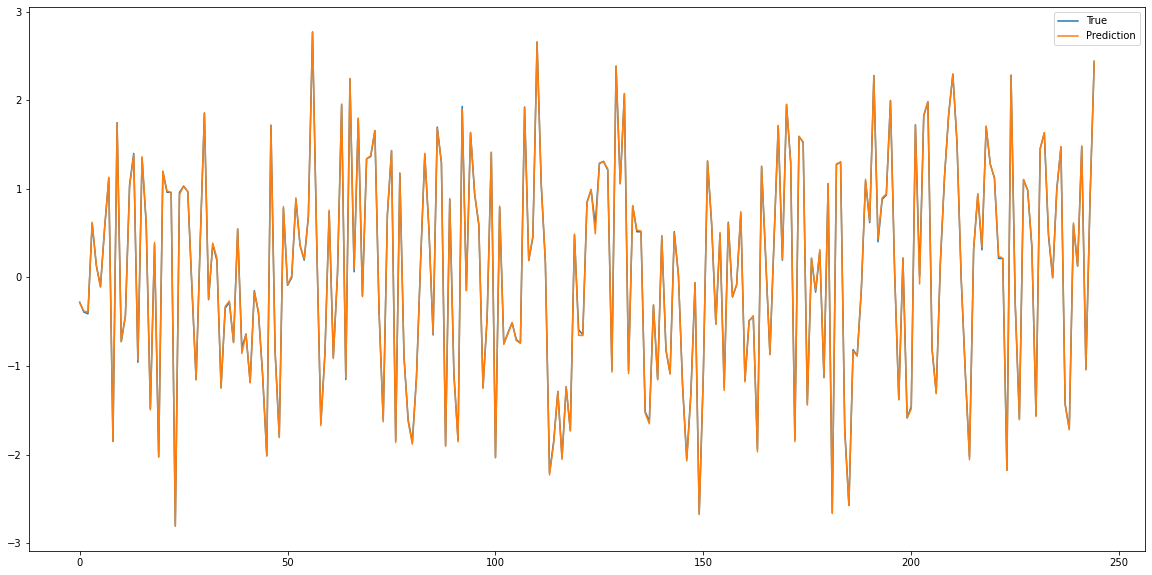

In [13]:
Y_prediction = model.predict(X_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(Y_test, label='True')
ax.plot(Y_prediction, label='Prediction')
ax.legend()
plt.show()